In [56]:
import hyperopt
from hyperopt import hp
from hyperopt import fmin, tpe, Trials

from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [94]:
def objective_fn(x):
    return (x-2)**2 

def get_evaluation_point(current_trial):
    return current_trial['misc']['vals']['x'][0], current_trial['result']['loss']

# Defino la función a minimizar

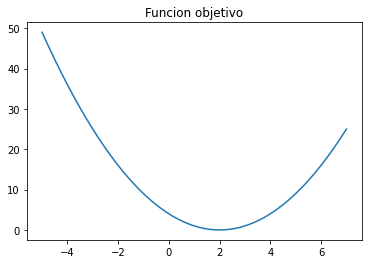

In [95]:
x_plot = np.linspace(-5,7)
y_plot = objective_fn(x_plot)

plt.plot(x_plot, y_plot)
plt.title('Funcion objetivo')
plt.show()

# hago el tunning

In [99]:
max_evals = 5

# define a search space
space = hp.uniform('x',-5,7)

trials = Trials()

# minimize the objective over the space
best = fmin(objective_fn, space, algo=tpe.suggest, max_evals=max_evals, trials = trials)
print(hyperopt.space_eval(space, best))

100%|██████████| 5/5 [00:00<00:00, 1088.86trial/s, best loss: 1.0002491835225142]
0.9998754159993295


# Evaluo mis resultados

In [100]:
list_x_evaluations = []
list_y_evaluations = []
evaluation_order = []

for current_trial in (trials.trials):
        current_x, current_y  = get_evaluation_point(current_trial)
        list_x_evaluations.append(current_x)
        list_y_evaluations.append(current_y)
        evaluation_order.append(current_trial['tid'])

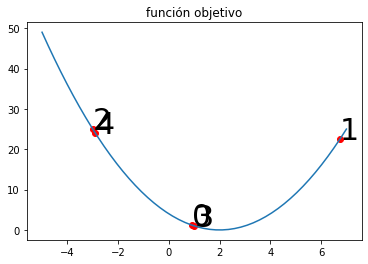

In [101]:
plt.scatter(list_x_evaluations, list_y_evaluations, c = 'r')
lista_x = np.linspace(-5,7)
lista_y = objective_fn(lista_x)

plt.title('función objetivo')
plt.plot(lista_x, lista_y)

for x,y,label in zip(list_x_evaluations, list_y_evaluations, evaluation_order):

    plt.annotate(label, (x,y),  fontsize=30)

plt.show()

# Vamos a usar tunning bayesiano para ajustar modelos

In [102]:
num_data = 100

X = np.linspace(0,10,num_data)
y = np.linspace(0,10,num_data) + np.random.normal(size = num_data)

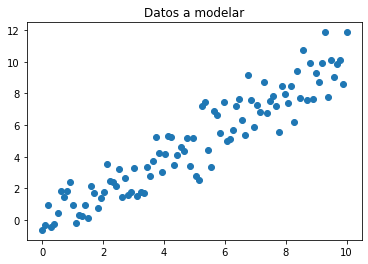

In [103]:
plt.scatter(X,y)
plt.title('Datos a modelar')
plt.show()

# Mis hipótesis sobre la realidad

In [106]:
#Yo tengo un modelo parametrico que quiero evaluar en mis datos
def modelo_parametrico(a):
    return a*X

#Tengo que definir una métrica
def fn_objetivo(a):
    error =  y - modelo_parametrico(a)
    error_cuadratico_medio = (error**2).mean()
    time.sleep(0.01)
    
    return error_cuadratico_medio

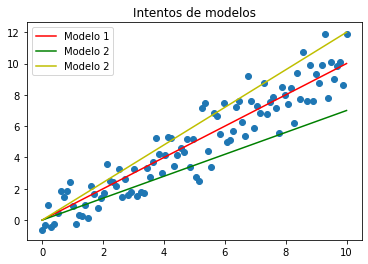

In [107]:
#Pruebo con algunos modelos distintos
plt.plot(X,modelo_parametrico(1), c = 'r', label = 'Modelo 1')
plt.plot(X,modelo_parametrico(0.7), c = 'g', label = 'Modelo 2')
plt.plot(X,modelo_parametrico(1.2), c = 'y', label = 'Modelo 2')

plt.scatter(X,y)
plt.legend()
plt.title('Intentos de modelos')

plt.show()

# Let's fit

In [112]:
max_evals = 1000

# define a search space
space = hp.uniform('x',-10,10)

trials = Trials()

# minimize the objective over the space
best = fmin(fn_objetivo, space, algo=tpe.suggest, max_evals=max_evals, trials = trials)
print(hyperopt.space_eval(space, best))

100%|██████████| 1000/1000 [00:19<00:00, 50.80trial/s, best loss: 1.2290299576766004]
0.9940986799174677


In [113]:
list_x_evaluations = []

for current_trial in (trials.trials):
        current_x, current_y  = get_evaluation_point(current_trial)
        list_x_evaluations.append(current_x)
        list_y_evaluations.append(current_y)

# Dónde estuviste buscando?

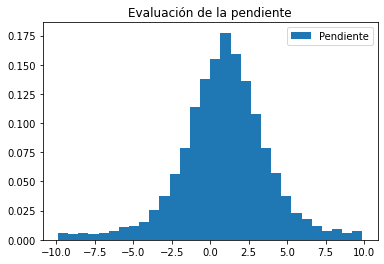

In [114]:
plt.hist(list_x_evaluations, bins = 30, density = True, label = 'Pendiente')

plt.legend()
plt.title('Evaluación de la pendiente')
plt.show()

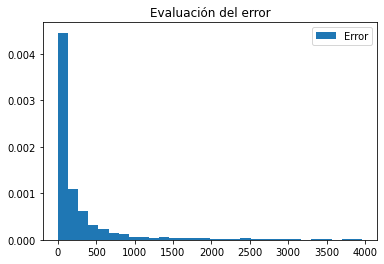

In [115]:
#El busca en los lugares que cree mas conveniente
plt.hist(list_y_evaluations, bins = 30, density = True, label = 'Error')

plt.legend()
plt.title('Evaluación del error')
plt.show()